**Health tips recommendation and tips recommendor using multiple ouput regressor**

In [19]:
import pandas as pd
df = pd.read_csv('/content/sample_health_recommendations_1000.csv')
df.head()


,Glucose Level,Activity Suggestion,Health Tip
0,144,Strength training for 30 minutes,Manage stress through meditation
1,149,Yoga session,Monitor your blood sugar
2,164,Swimming for 30 minutes,Get enough sleep
3,194,Pilates session,Limit processed foods
4,111,Stretching exercises,Limit processed foods


In [20]:
from sklearn.preprocessing import LabelEncoder

activity_encoder = LabelEncoder()
health_tip_encoder = LabelEncoder()

df['Activity Suggestion'] = activity_encoder.fit_transform(df['Activity Suggestion'])
df['Health Tip'] = health_tip_encoder.fit_transform(df['Health Tip'])

df.head()


,Glucose Level,Activity Suggestion,Health Tip
0,144,5,7
1,149,9,8
2,164,7,3
3,194,4,5
4,111,6,5


In [21]:
print(df.head())

print(df.info())

print(df.describe(include='all'))


   Glucose Level  Activity Suggestion  Health Tip
0            144                    5           7
1            149                    9           8
2            164                    7           3
3            194                    4           5
4            111                    6           5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Glucose Level        1000 non-null   int64
 1   Activity Suggestion  1000 non-null   int64
 2   Health Tip           1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None
       Glucose Level  Activity Suggestion   Health Tip
count     1000.00000          1000.000000  1000.000000
mean       134.87900             4.298000     4.367000
std         37.54016             2.882274     2.953478
min         70.00000             0.000000     0.000000
25%        102.00000             2.0

In [22]:
# Check for missing values
print(df.isnull().sum())

# Percentage of missing values
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)


Glucose Level          0
Activity Suggestion    0
Health Tip             0
dtype: int64
Glucose Level          0.0
Activity Suggestion    0.0
Health Tip             0.0
dtype: float64


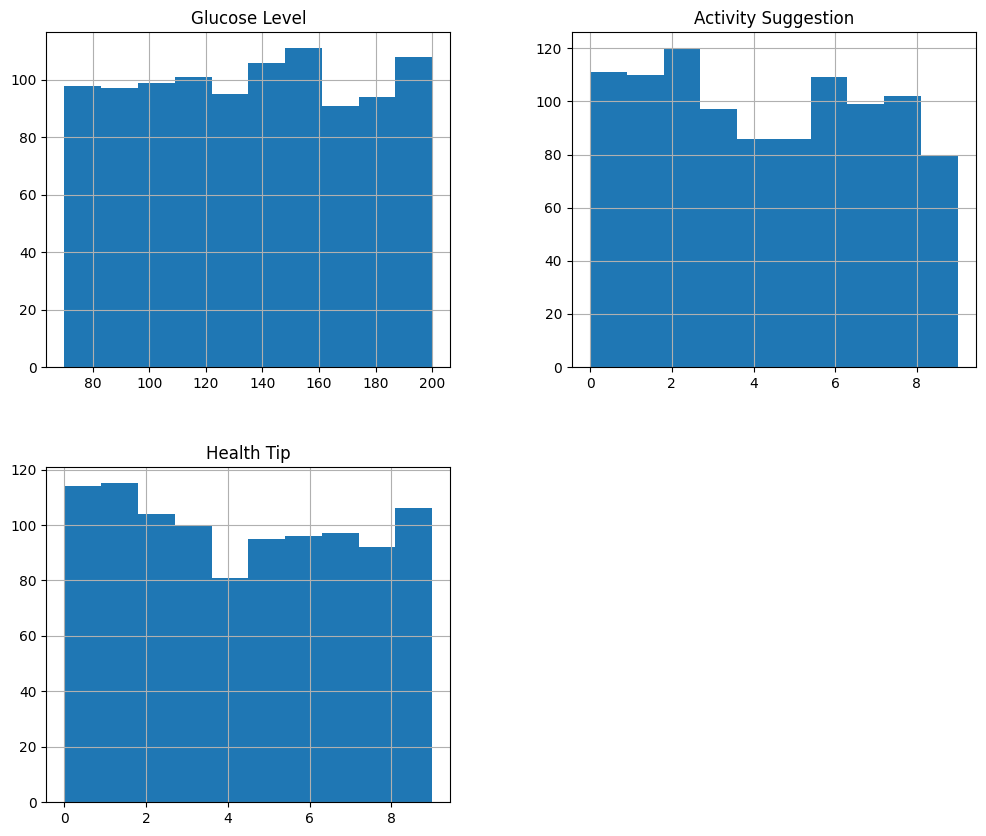

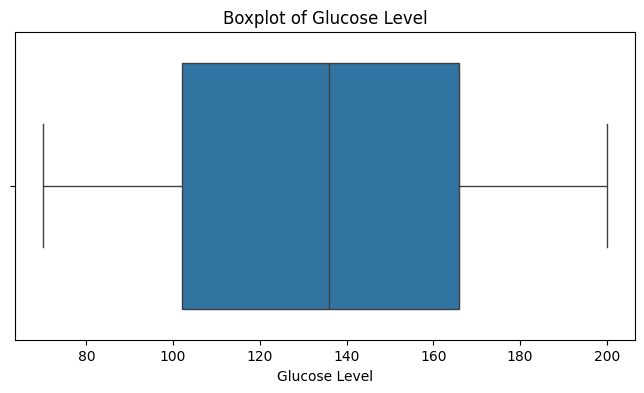

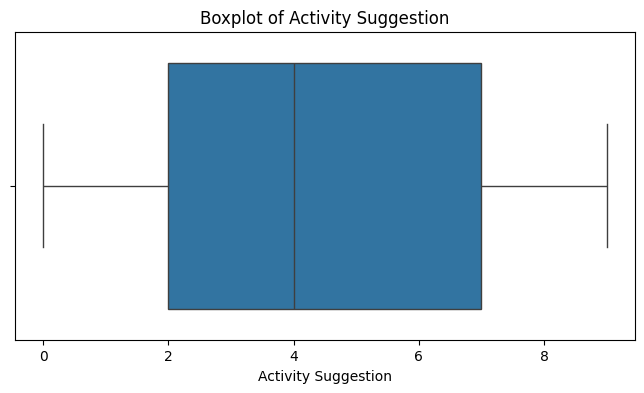

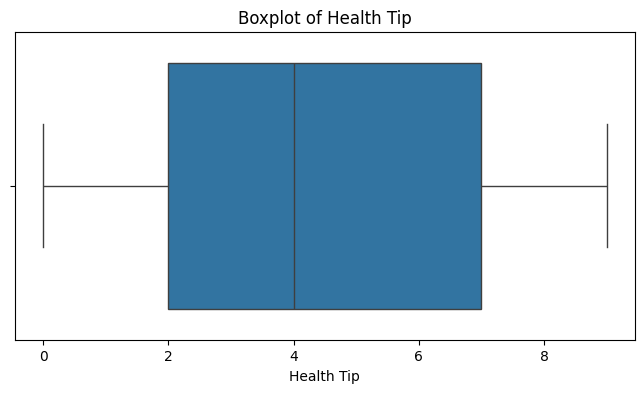

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df.hist(figsize=(12, 10))
plt.show()

for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


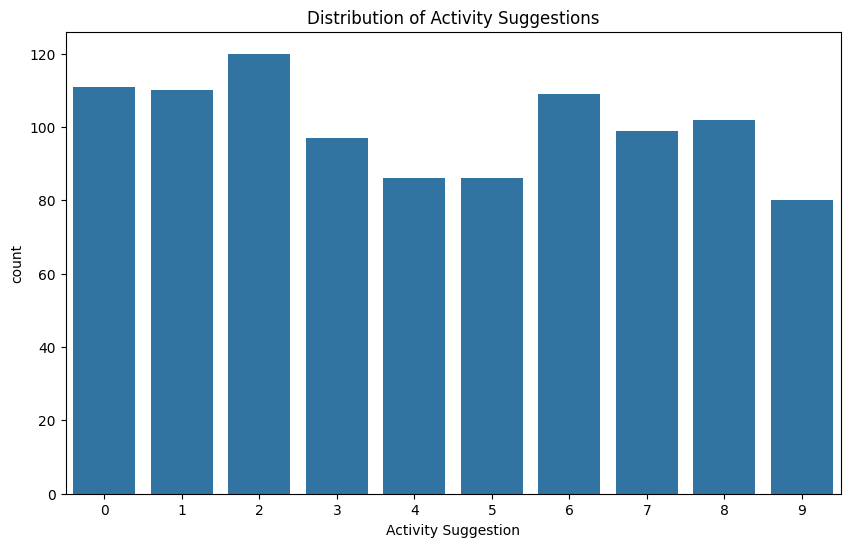

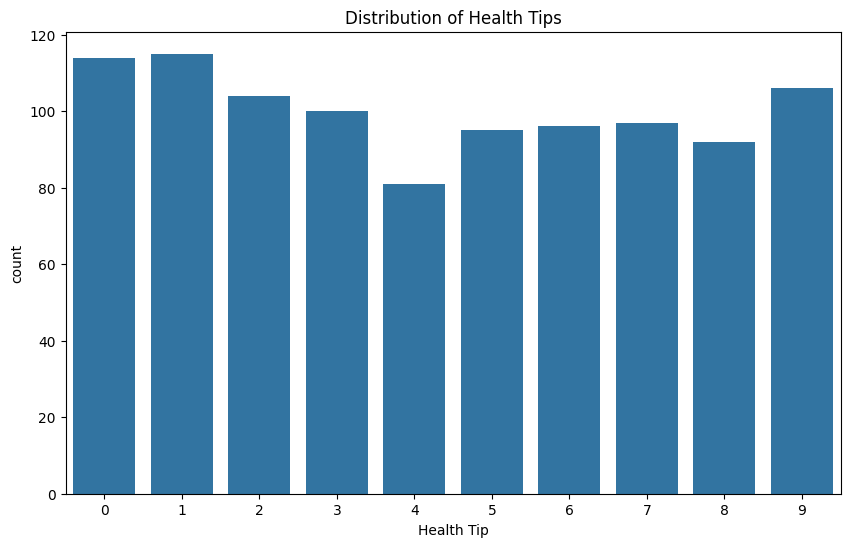

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Activity Suggestion')
plt.title('Distribution of Activity Suggestions')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Health Tip')
plt.title('Distribution of Health Tips')
plt.show()


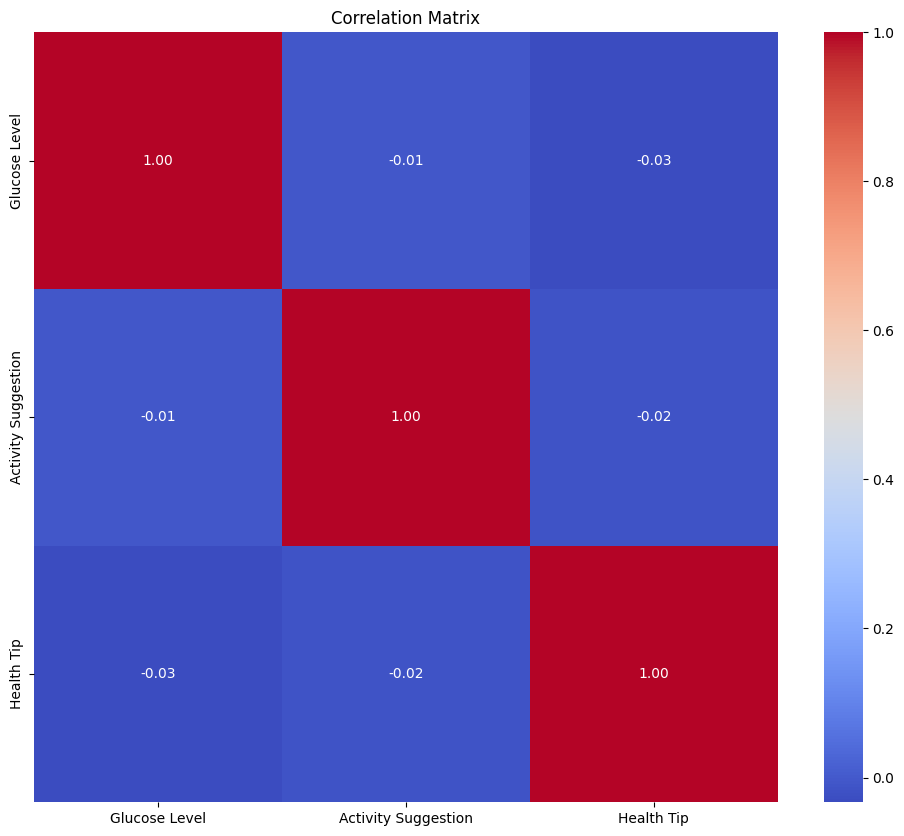

In [25]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


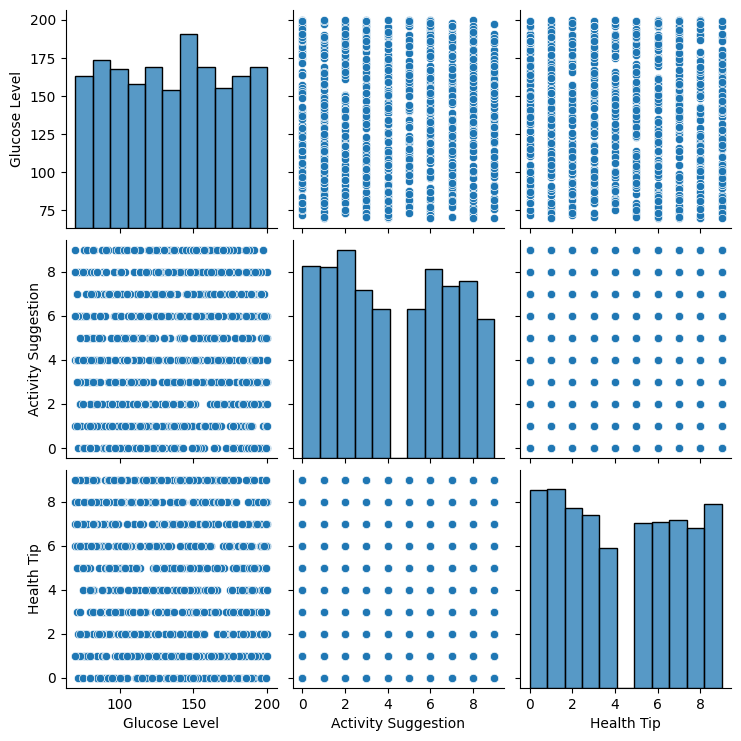

In [26]:
# Pairplot for numerical columns
sns.pairplot(df)
plt.show()


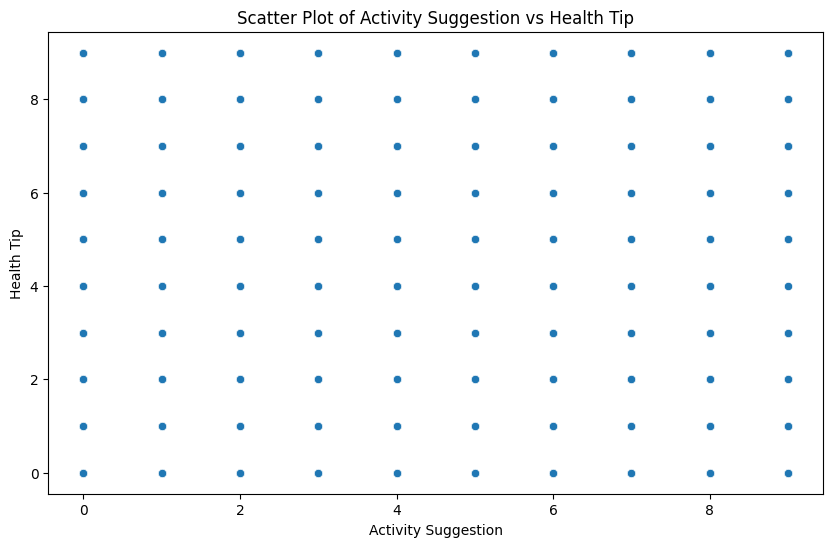

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Activity Suggestion', y='Health Tip')
plt.title('Scatter Plot of Activity Suggestion vs Health Tip')
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Split the data into features and targets
X = df[['Glucose Level']]
y = df[['Activity Suggestion', 'Health Tip']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

# Train the model
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [29]:
y_pred = model.predict(X_test)

# Convert predictions and true values back to categorical
y_test_activity = activity_encoder.inverse_transform(y_test['Activity Suggestion'])
y_pred_activity = activity_encoder.inverse_transform(y_pred[:, 0].astype(int))

y_test_health_tip = health_tip_encoder.inverse_transform(y_test['Health Tip'])
y_pred_health_tip = health_tip_encoder.inverse_transform(y_pred[:, 1].astype(int))

# Display some example predictions
for i in range(10):
    print(f"Glucose Level: {X_test.iloc[i, 0]}")
    print(f"True Activity Suggestion: {y_test_activity[i]}, Predicted Activity Suggestion: {y_pred_activity[i]}")
    print(f"True Health Tip: {y_test_health_tip[i]}, Predicted Health Tip: {y_pred_health_tip[i]}")
    print("---")


Glucose Level: 197
True Activity Suggestion: Stretching exercises, Predicted Activity Suggestion: Stretching exercises
True Health Tip: Exercise regularly, Predicted Health Tip: Include protein in every meal
---
Glucose Level: 127
True Activity Suggestion: Walk for 30 minutes, Predicted Activity Suggestion: Pilates session
True Health Tip: Avoid sugary foods, Predicted Health Tip: Get enough sleep
---
Glucose Level: 122
True Activity Suggestion: Yoga session, Predicted Activity Suggestion: Pilates session
True Health Tip: Avoid sugary foods, Predicted Health Tip: Include protein in every meal
---
Glucose Level: 147
True Activity Suggestion: Walk for 30 minutes, Predicted Activity Suggestion: Pilates session
True Health Tip: Stay hydrated, Predicted Health Tip: Include protein in every meal
---
Glucose Level: 113
True Activity Suggestion: Pilates session, Predicted Activity Suggestion: High-intensity interval training for 20 minutes
True Health Tip: Exercise regularly, Predicted Health 

In [30]:
import joblib

joblib.dump(model, 'model.pkl')

# Save the encoders
joblib.dump(activity_encoder, 'activity_encoder.pkl')
joblib.dump(health_tip_encoder, 'health_tip_encoder.pkl')


['health_tip_encoder.pkl']